# Introduction to Recommender Systems

<p align="center">
    <img width="721" alt="cover-image" src="https://user-images.githubusercontent.com/49638680/204351915-373011d3-75ac-4e21-a6df-99cd1c552f2c.png">
</p>

---

# Final Project

## Dataset

The dataset is available at [KuaiRec](https://nas.chongminggao.top:4430/datasets/KuaiRec.zip).

We can download the dataset via a wget command:

In [2]:
%%bash
wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470
' -O KuaiRec.zip
unzip KuaiRec.zip -d data_final_project



--2025-05-08 13:01:19--  https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470%0A
Resolving drive.usercontent.google.com (drive.usercontent.google.com)... 2a00:1450:4007:80e::2001, 172.217.20.193
Connecting to drive.usercontent.google.com (drive.usercontent.google.com)|2a00:1450:4007:80e::2001|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 431964858 (412M) [application/octet-stream]
Saving to: ‘KuaiRec.zip’

     0K .......... .......... .......... .......... ..........  0% 4,90M 84s
    50K .......... .......... .......... .......... ..........  0% 6,46M 74s
   100K .......... .......... .......... .......... ..........  0% 19,5M 56s
   150K .......... .......... .......... .......... ..........  0% 15,3M 49s
   200K .......... .......... .......... .......... ..........  0% 17,7M 44s
   250K .......... .......... .......... .......... ..........  0% 38,1M 38s
  

Process was interrupted.


CalledProcessError: Command 'b"wget --no-check-certificate 'https://drive.usercontent.google.com/download?id=1qe5hOSBxzIuxBb1G_Ih5X-O65QElollE&export=download&confirm=t&uuid=b2002093-cc6e-4bd5-be47-9603f0b33470\n' -O KuaiRec.zip\nunzip KuaiRec.zip -d data_final_project\n\n"' died with <Signals.SIGINT: 2>.

## Exploratory Data Analysis

The exploratory data analysis is something that you should do before building your recommender system. It is a good way to understand your data and to get insights about it. The main goal of such a procedure is to get answers to several questions about your data, these answers should be the numerical justification for all your choices in the following steps, in particular for the feature engineering and the model selection.

In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

For this data analysis, we will focus on the interaction data, i.e., the data that contains the user-item interactions. If you make the choice to use the other data available, you should repeat the same kind of analysis on the other data as well.

In [ ]:
interactions = pd.read_csv("./data_final_project/KuaiRec 2.0/data/small_matrix.csv")

interactions.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,20200705.0,1.593898e+09,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,20200705.0,1.593898e+09,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,20200705.0,1.593898e+09,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,20200705.0,1.593898e+09,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,20200705.0,1.593899e+09,0.418364


In [10]:
interactions['timestamp'] = pd.to_datetime(interactions['timestamp'], unit='s')

In [12]:
interactions['date'] = pd.to_datetime(interactions['date'].astype(int), format='%Y%m%d')


In [13]:
interactions.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,14,148,4381,6067,2020-07-05 05:27:48.378,2020-07-05,2020-07-04 21:27:48.378000021,0.722103
1,14,183,11635,6100,2020-07-05 05:28:00.057,2020-07-05,2020-07-04 21:28:00.056999922,1.907377
2,14,3649,22422,10867,2020-07-05 05:29:09.479,2020-07-05,2020-07-04 21:29:09.479000092,2.063311
3,14,5262,4479,7908,2020-07-05 05:30:43.285,2020-07-05,2020-07-04 21:30:43.285000086,0.566388
4,14,8234,4602,11000,2020-07-05 05:35:43.459,2020-07-05,2020-07-04 21:35:43.459000111,0.418364


Try to answer the following questions:

- How many users and items are there in the data?
- What are the data types?
- How many unique users and unique videos?
- Are there timestamps, and if so, what is their range?
- How many interactions are there in the data?
- How many interactions are there per user?
- How many interactions are there per item?
- What is the distribution of the interactions?
- What is the distribution of the interactions per user?
- What is the distribution of the interactions per item?


**Note:** These are my questions, you should not limit yourself to these questions, be creative and ask yourself other questions about the data.

###  Data Quality & Missing Values

Try to check for missing values, duplicates, and other data quality issues, like impossible values, negative timestamps, etc.

In [14]:
# I do the most simple thing, I remove the rows with missing values
interactions = interactions.dropna()
# I also remove the duplicates
interactions = interactions.drop_duplicates()
# I also remove the rows with negative timestamps
interactions = interactions[interactions["timestamp"] >= 0]

TypeError: Invalid comparison between dtype=datetime64[ns] and int

### Basic Statistics & Distributions

Try to compute the basic statistics and distributions of the data.

#### Interactions per User

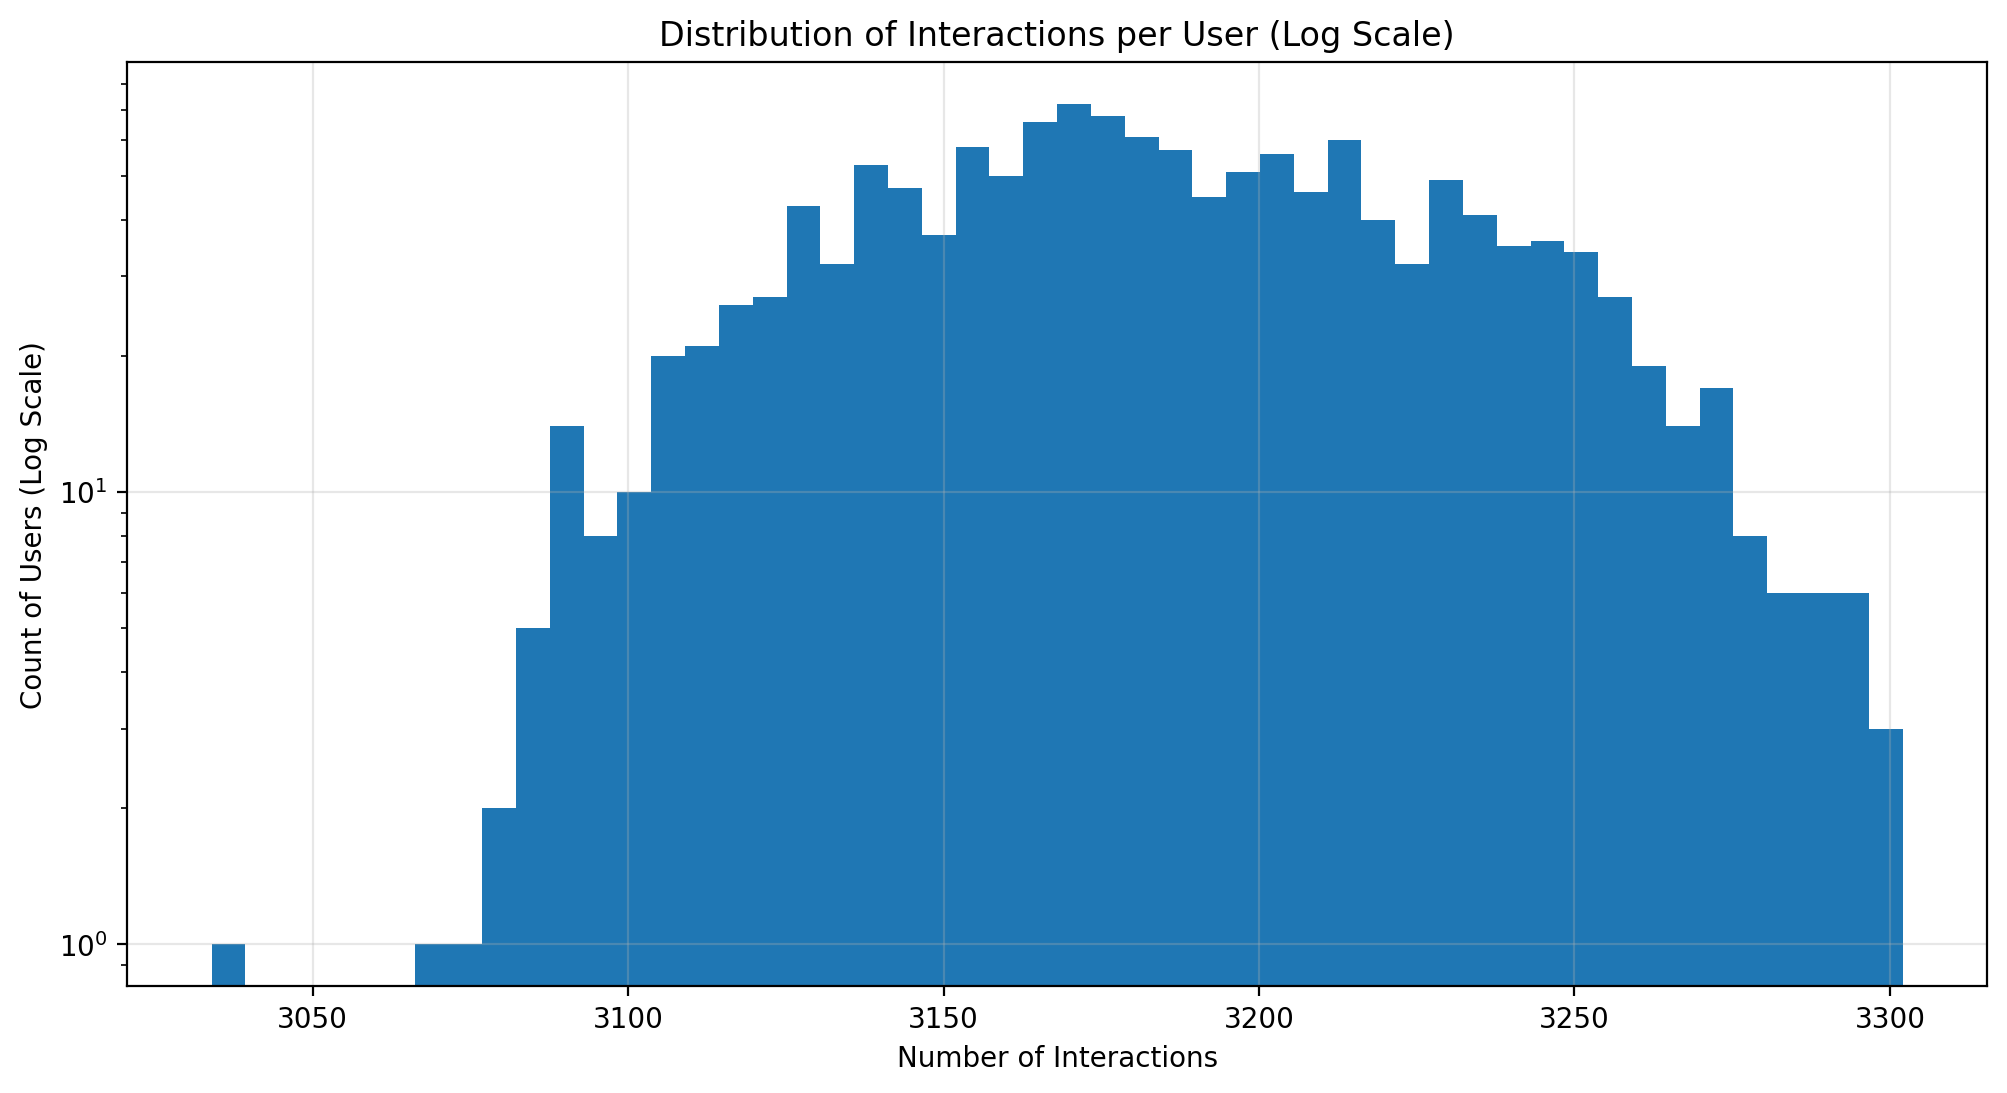

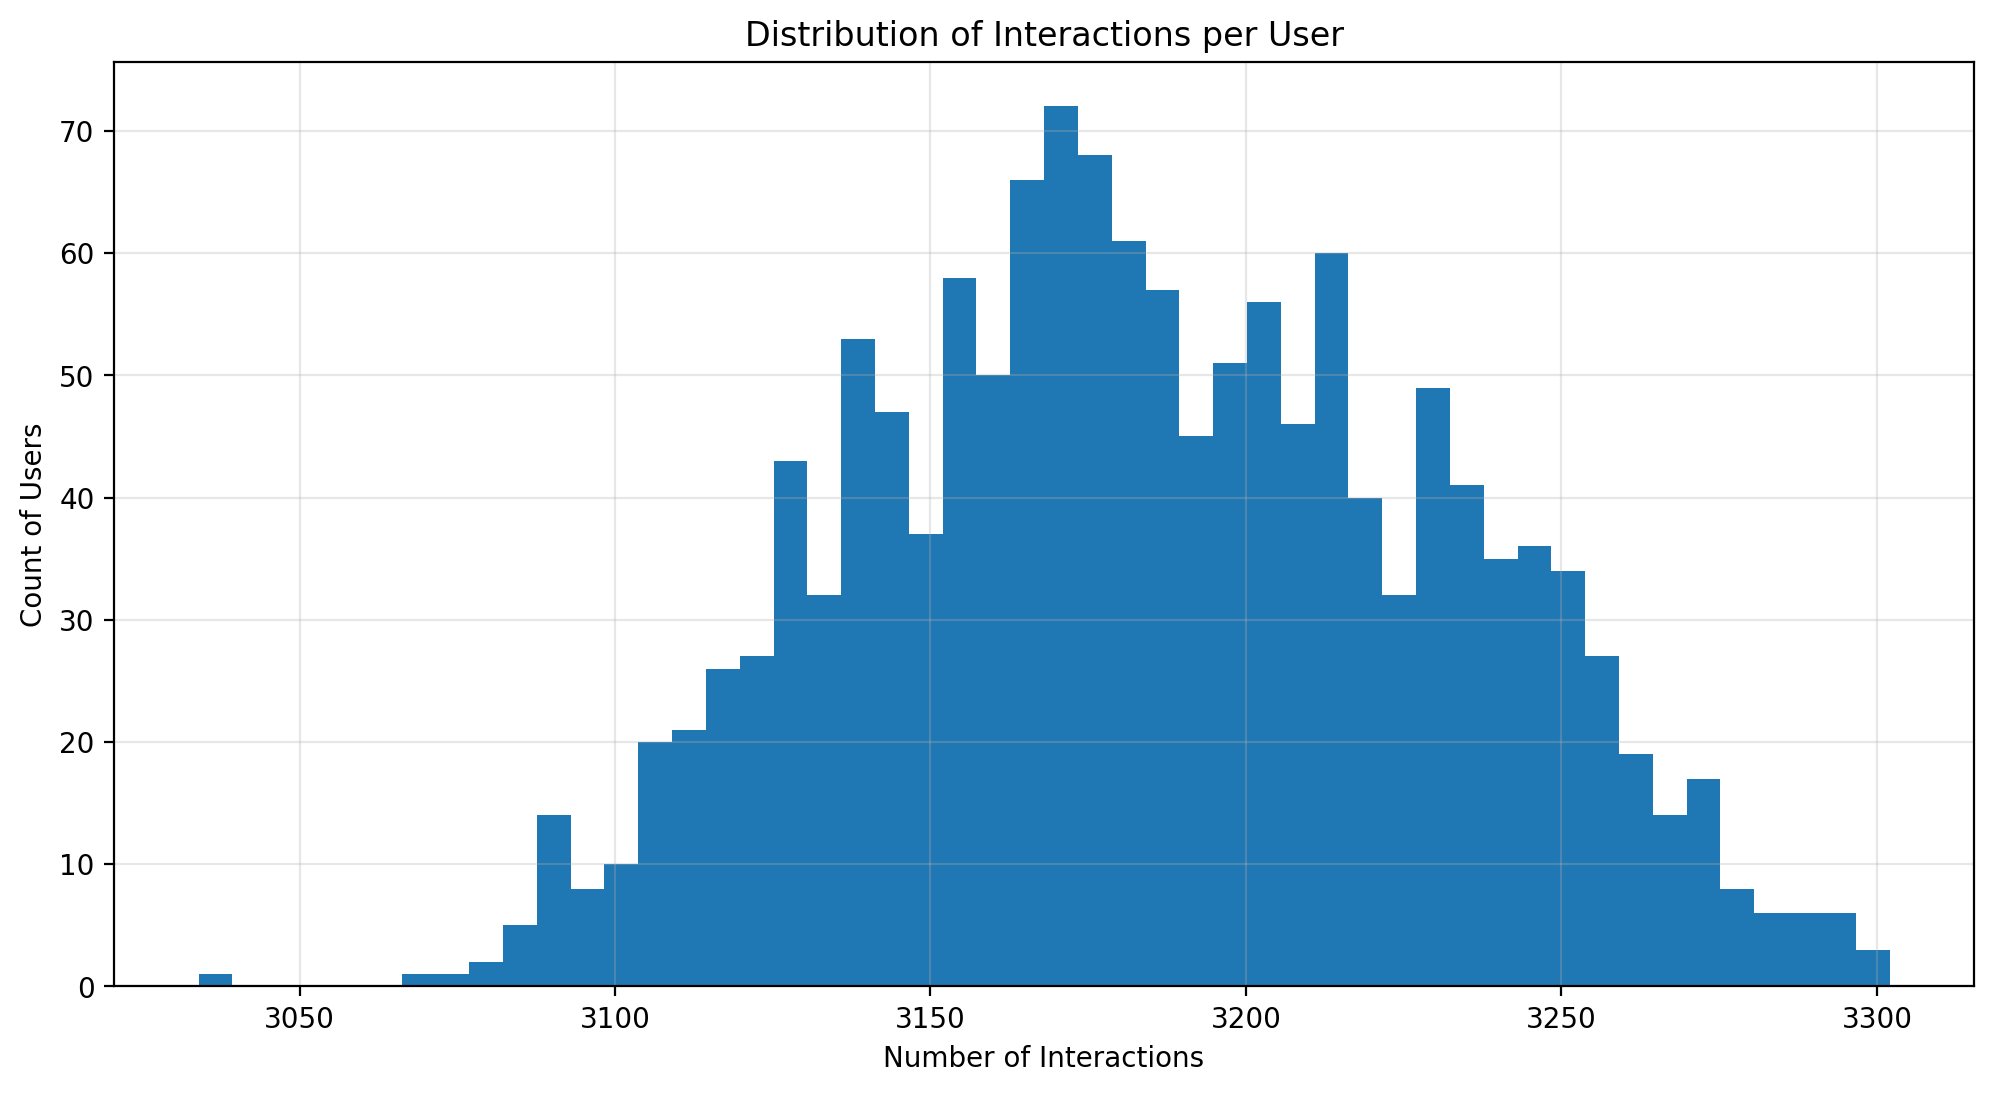

In [4]:
# Plot log histogram of interactions per user
# Get counts per user
user_counts = interactions["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

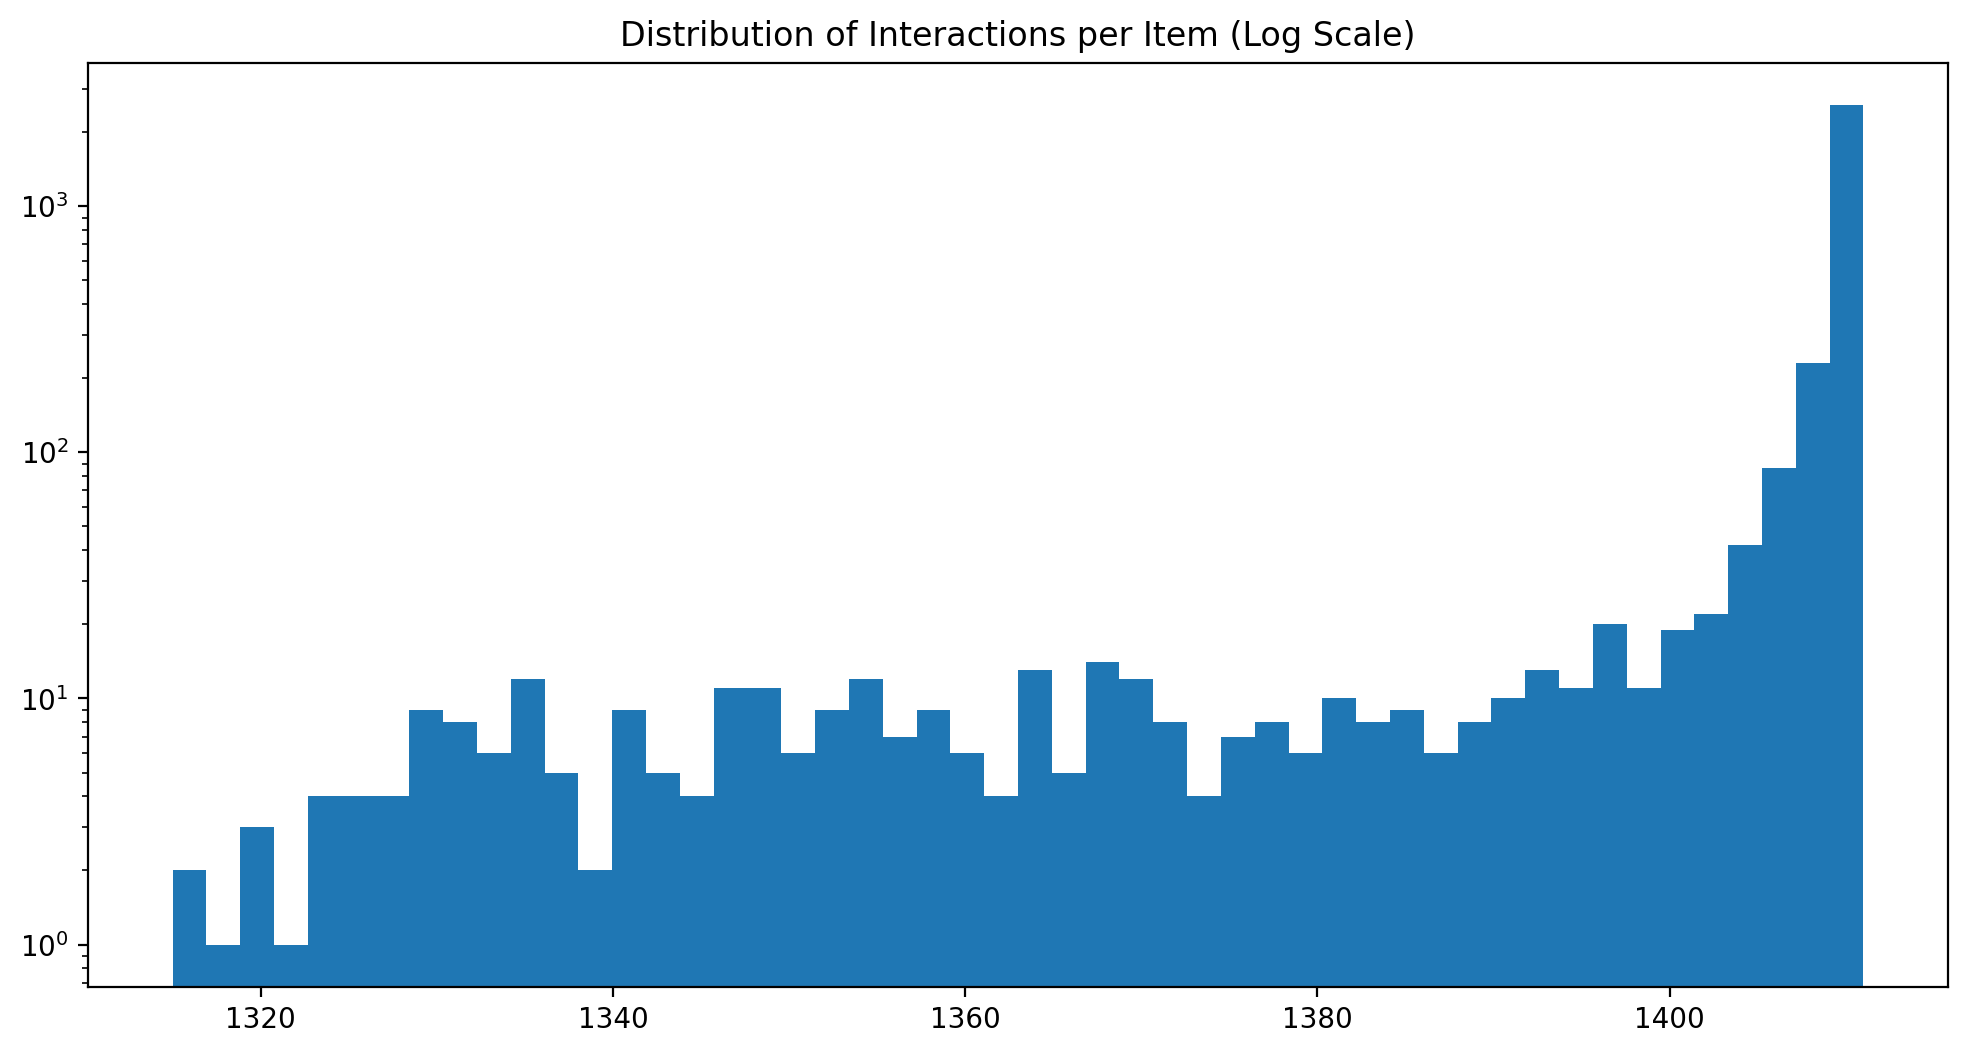

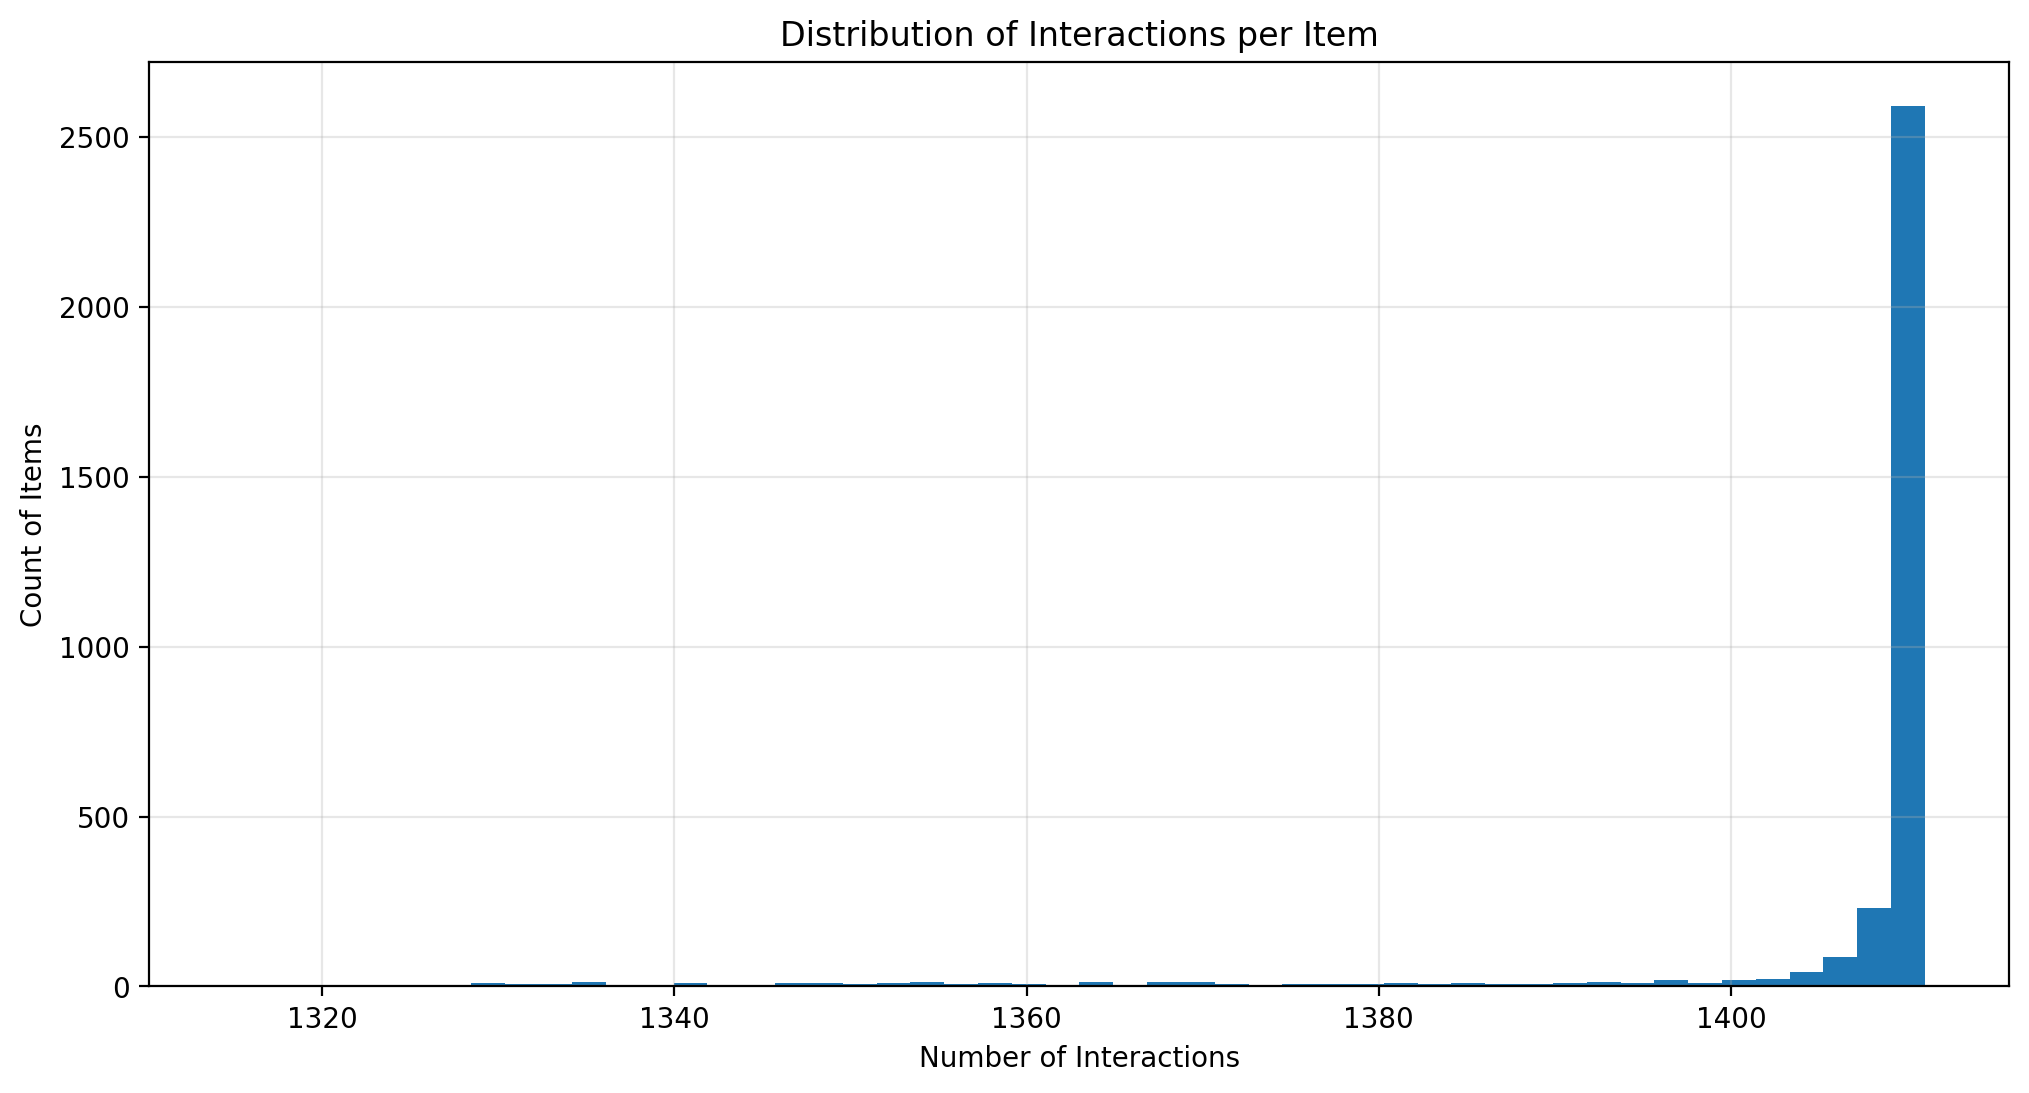

In [4]:
# Let's see the distribution of the interactions per item
item_counts = interactions["video_id"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

### Temporal Analysis

Let's see the distribution of the interactions over time.

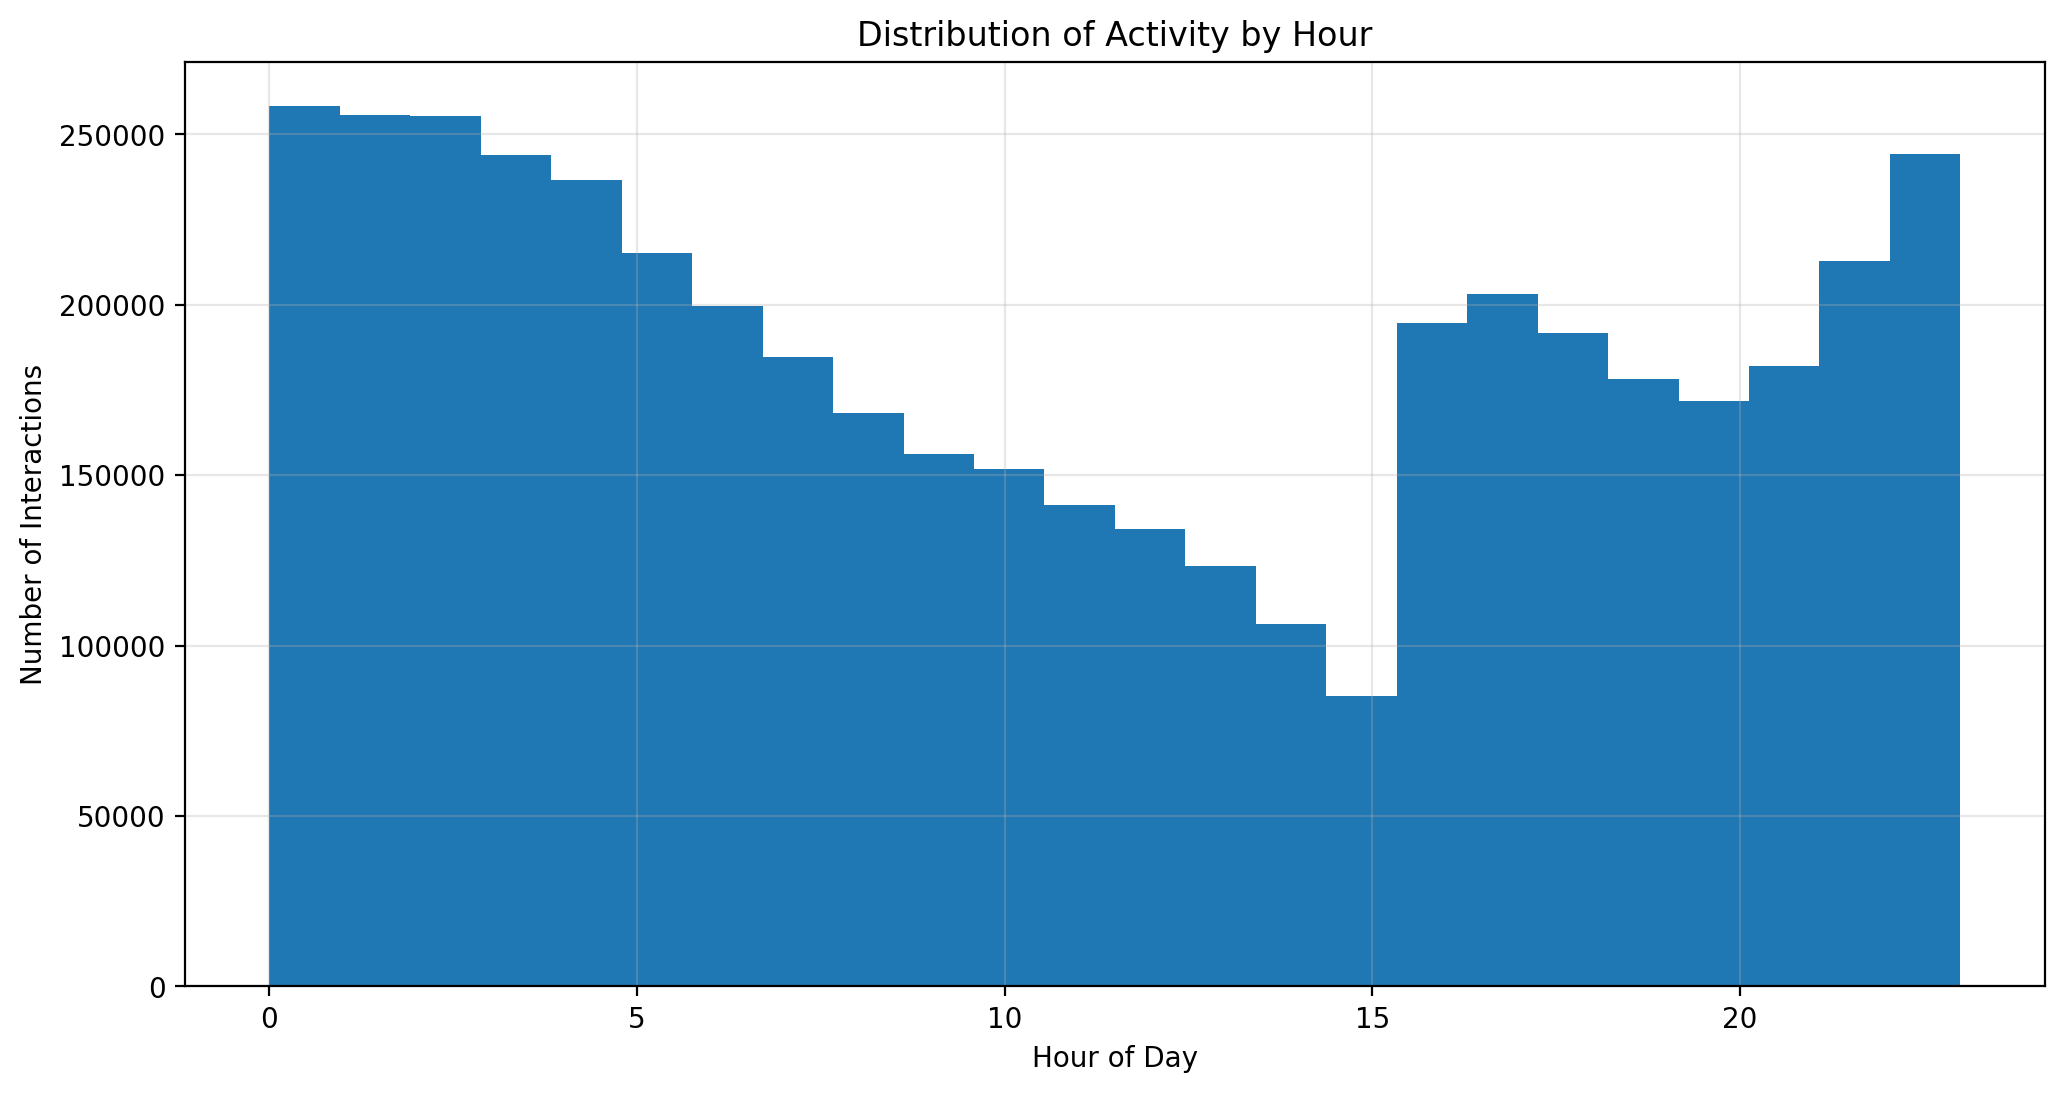

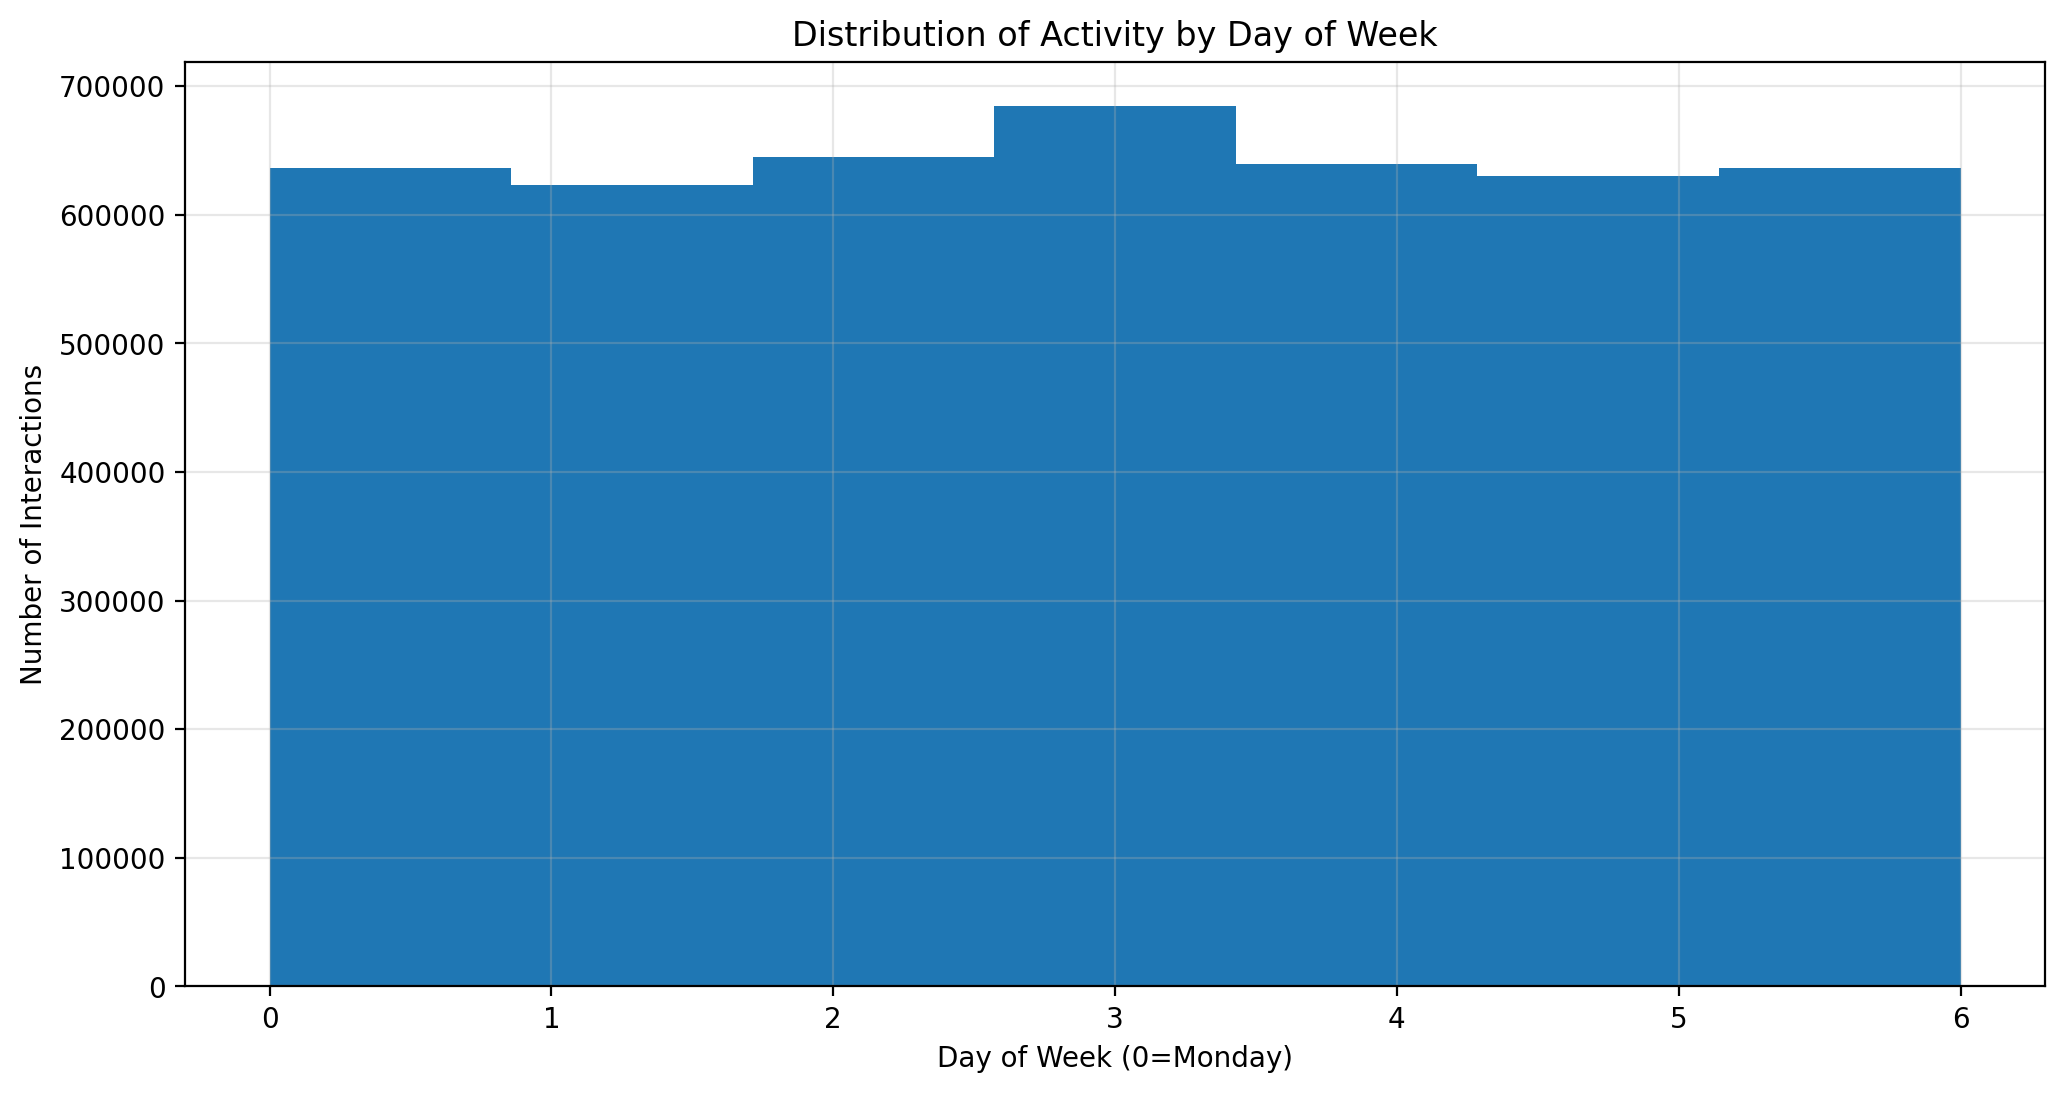

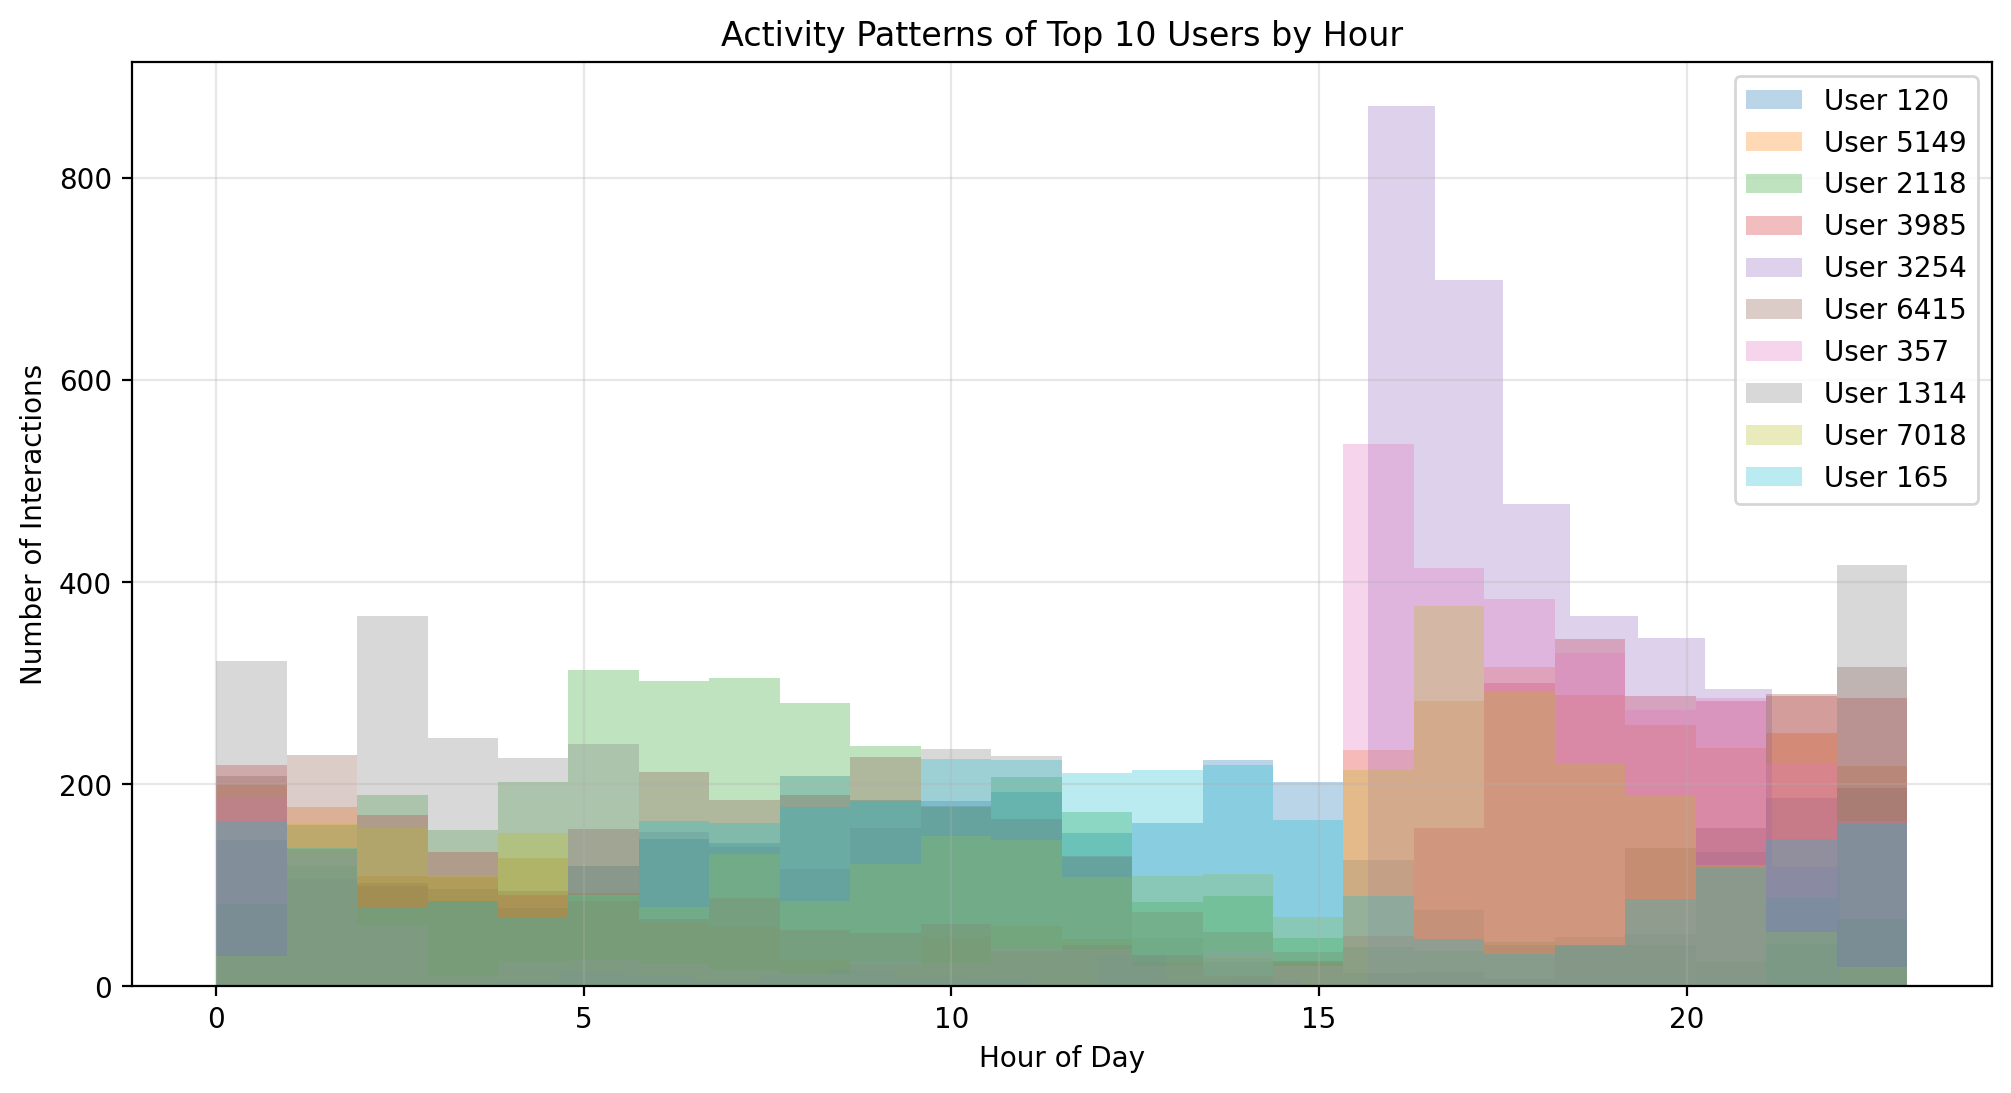


Peak Usage Hours:
Hour 0:00 - 258202 interactions
Hour 1:00 - 255557 interactions
Hour 2:00 - 255403 interactions

Peak Usage Days:
Thursday - 684255 interactions
Wednesday - 644928 interactions
Friday - 639221 interactions


In [5]:
# Convert timestamp to datetime
interactions["timestamp"] = pd.to_datetime(
    interactions["timestamp"].fillna(0), unit="s"
)

interactions["hour"] = interactions["timestamp"].dt.hour
interactions["day"] = interactions["timestamp"].dt.dayofweek

# Plot activity over time
plt.figure(figsize=(12, 6))
plt.hist(interactions["hour"], bins=24)
plt.title("Distribution of Activity by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Plot activity by day of week
plt.figure(figsize=(12, 6))
plt.hist(interactions["day"], bins=7)
plt.title("Distribution of Activity by Day of Week")
plt.xlabel("Day of Week (0=Monday)")
plt.ylabel("Number of Interactions")
plt.grid(True, alpha=0.3)
plt.show()

# Get top 10 most active users
top_users = interactions["user_id"].value_counts().head(10).index

# Plot activity patterns for top users
plt.figure(figsize=(12, 6))
for user in top_users:
    user_data = interactions[interactions["user_id"] == user]
    plt.hist(user_data["hour"], bins=24, alpha=0.3, label=f"User {user}")
plt.title("Activity Patterns of Top 10 Users by Hour")
plt.xlabel("Hour of Day")
plt.ylabel("Number of Interactions")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

# Find peak usage times
hourly_activity = interactions.groupby("hour").size()
peak_hours = hourly_activity.nlargest(3)

print("\nPeak Usage Hours:")
for hour, count in peak_hours.items():
    print(f"Hour {hour}:00 - {count} interactions")

daily_activity = interactions.groupby("day").size()
peak_days = daily_activity.nlargest(3)

print("\nPeak Usage Days:")
for day, count in peak_days.items():
    days = [
        "Monday",
        "Tuesday",
        "Wednesday",
        "Thursday",
        "Friday",
        "Saturday",
        "Sunday",
    ]
    print(f"{days[int(day)]} - {count} interactions")

In [6]:
interactions["timestamp"]

0         2020-07-04 21:27:48.378000021
1         2020-07-04 21:28:00.056999922
2         2020-07-04 21:29:09.479000092
3         2020-07-04 21:30:43.285000086
4         2020-07-04 21:35:43.459000111
                       ...             
4676370   2020-09-01 12:06:35.983999968
4676371   2020-09-02 06:44:51.342000008
4676372   2020-09-03 00:45:01.473999977
4676373   2020-09-04 14:56:32.020999908
4676374   2020-09-04 16:32:09.154000044
Name: timestamp, Length: 4494578, dtype: datetime64[ns]

In [3]:
df = pd.read_csv("./data_final_project/KuaiRec 2.0/data/big_matrix.csv")

: 

In [3]:
df.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [9]:
for column in df.columns:
    if not df[df[column].isna()].empty:
        print(f"Column: {column}")
        print(df[df[column].isna()])

In [12]:
df[df['play_duration'] < 0]

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio


In [13]:
df[df['video_duration'] < 0]

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio


In [14]:
df[df['timestamp'] < 0]

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio


In [15]:
df[df['date'] < 0]

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio


In [16]:
df[df['watch_ratio'] < 0]

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio


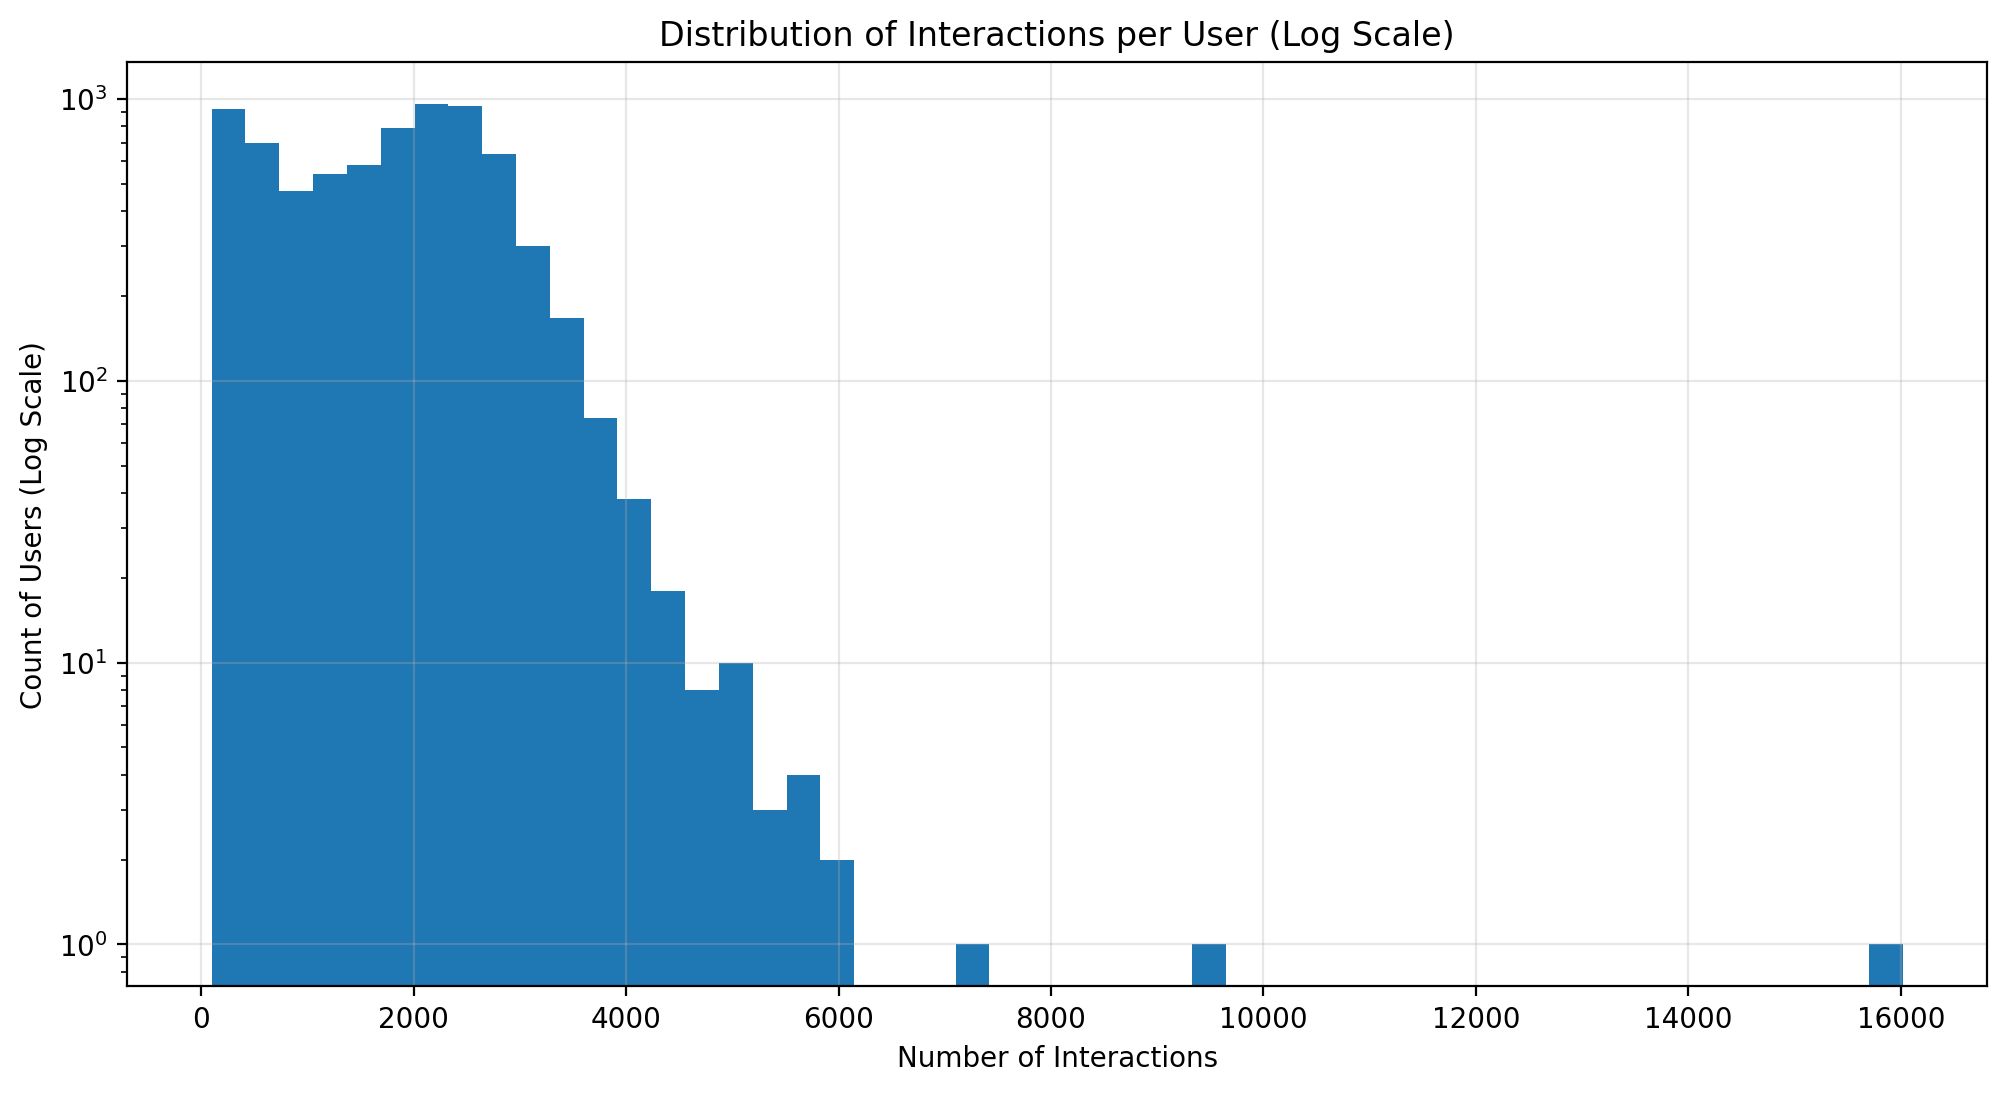

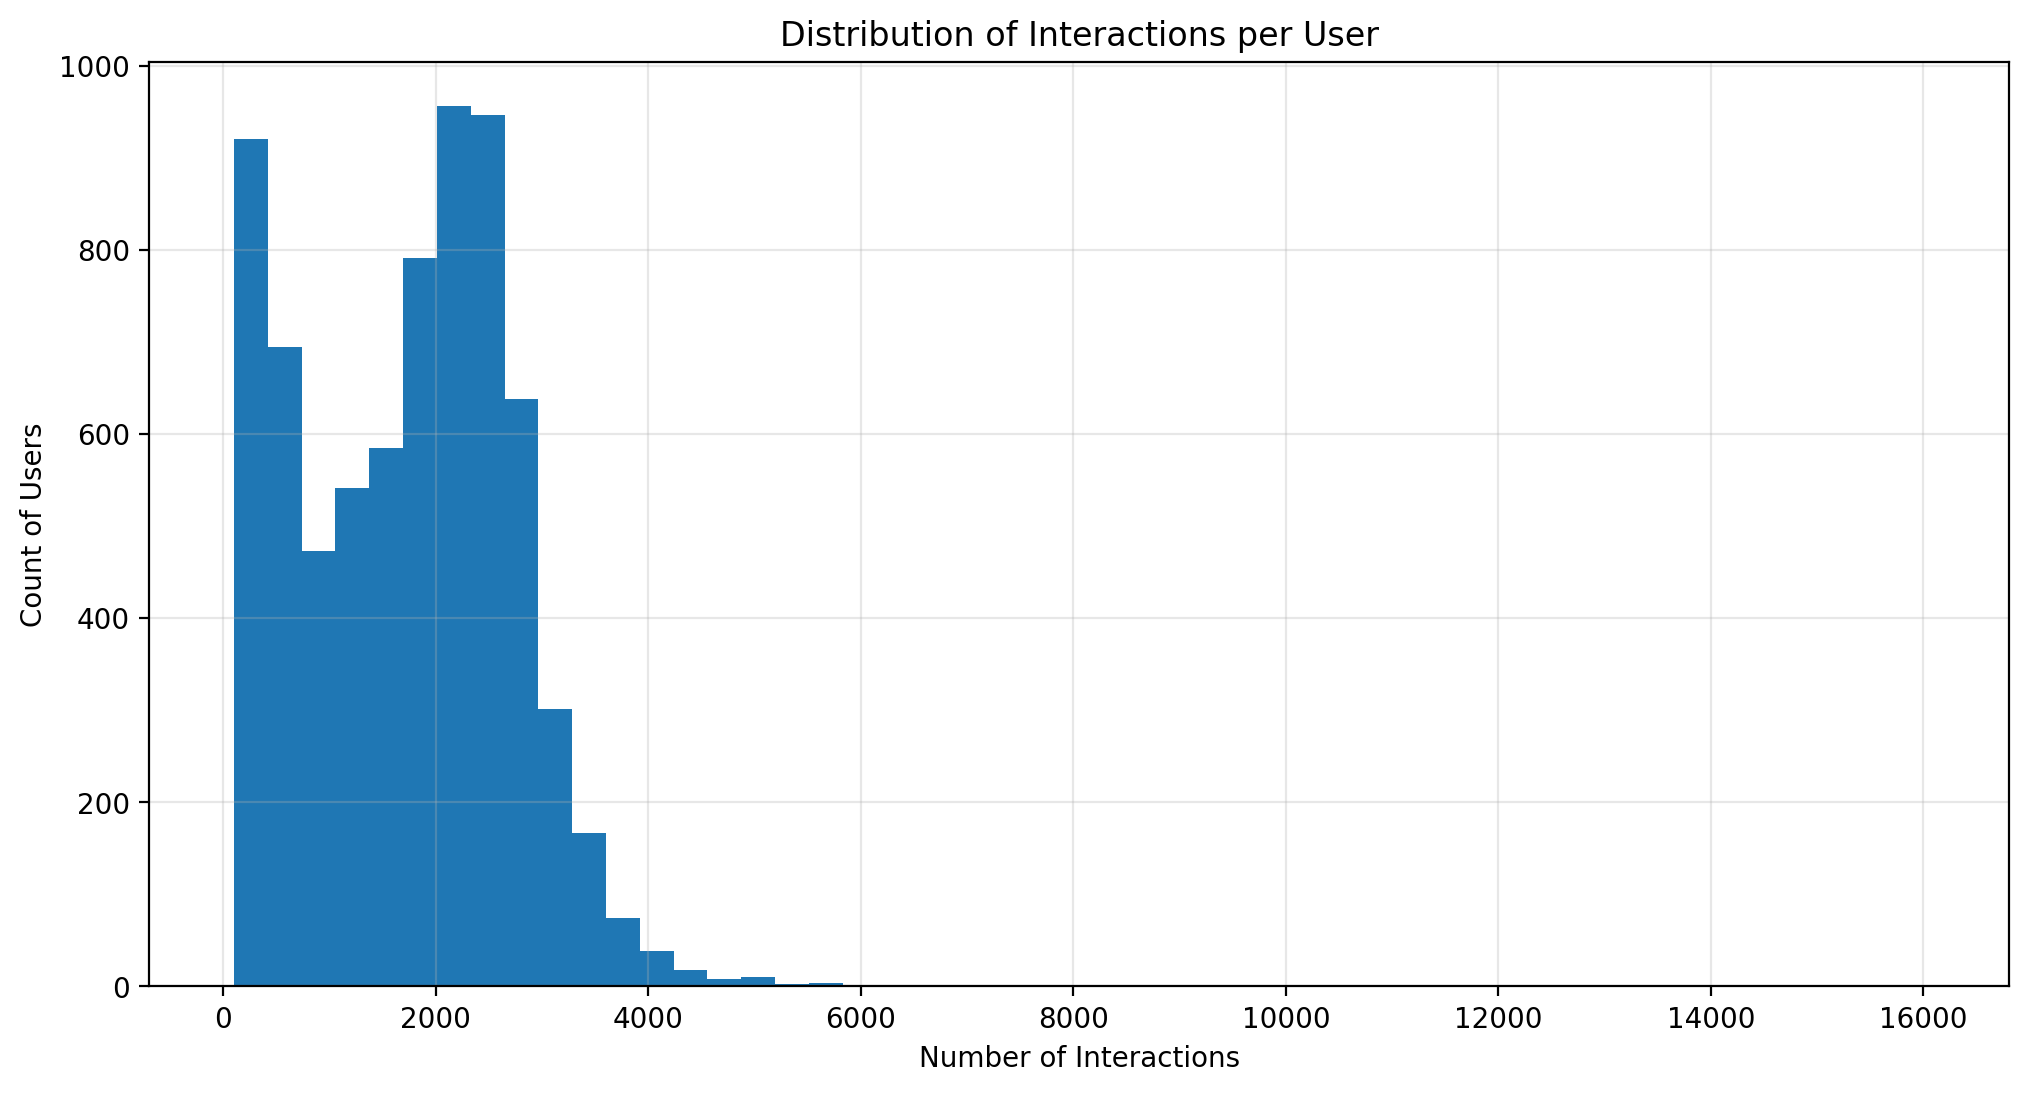

In [ ]:
# Plot log histogram of interactions per user
# Get counts per user
user_counts = df["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()user_counts = df["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

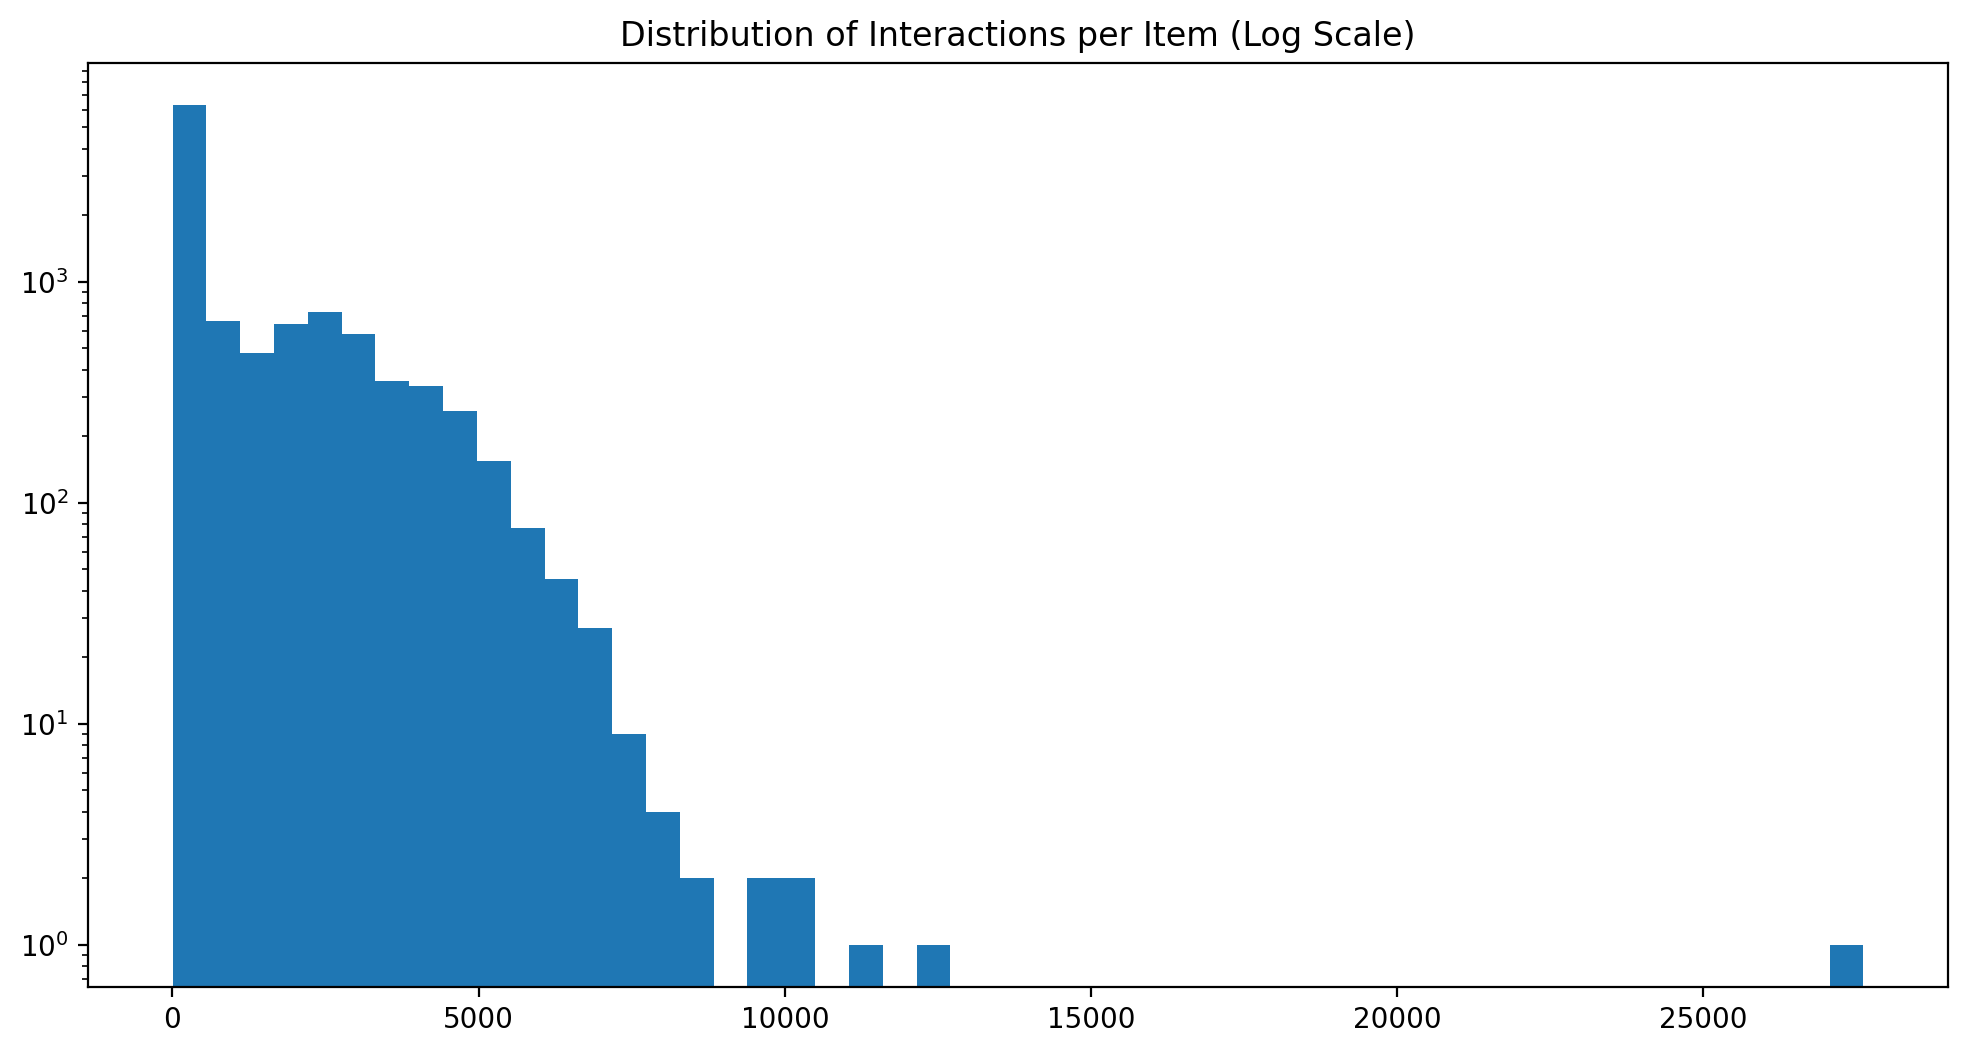

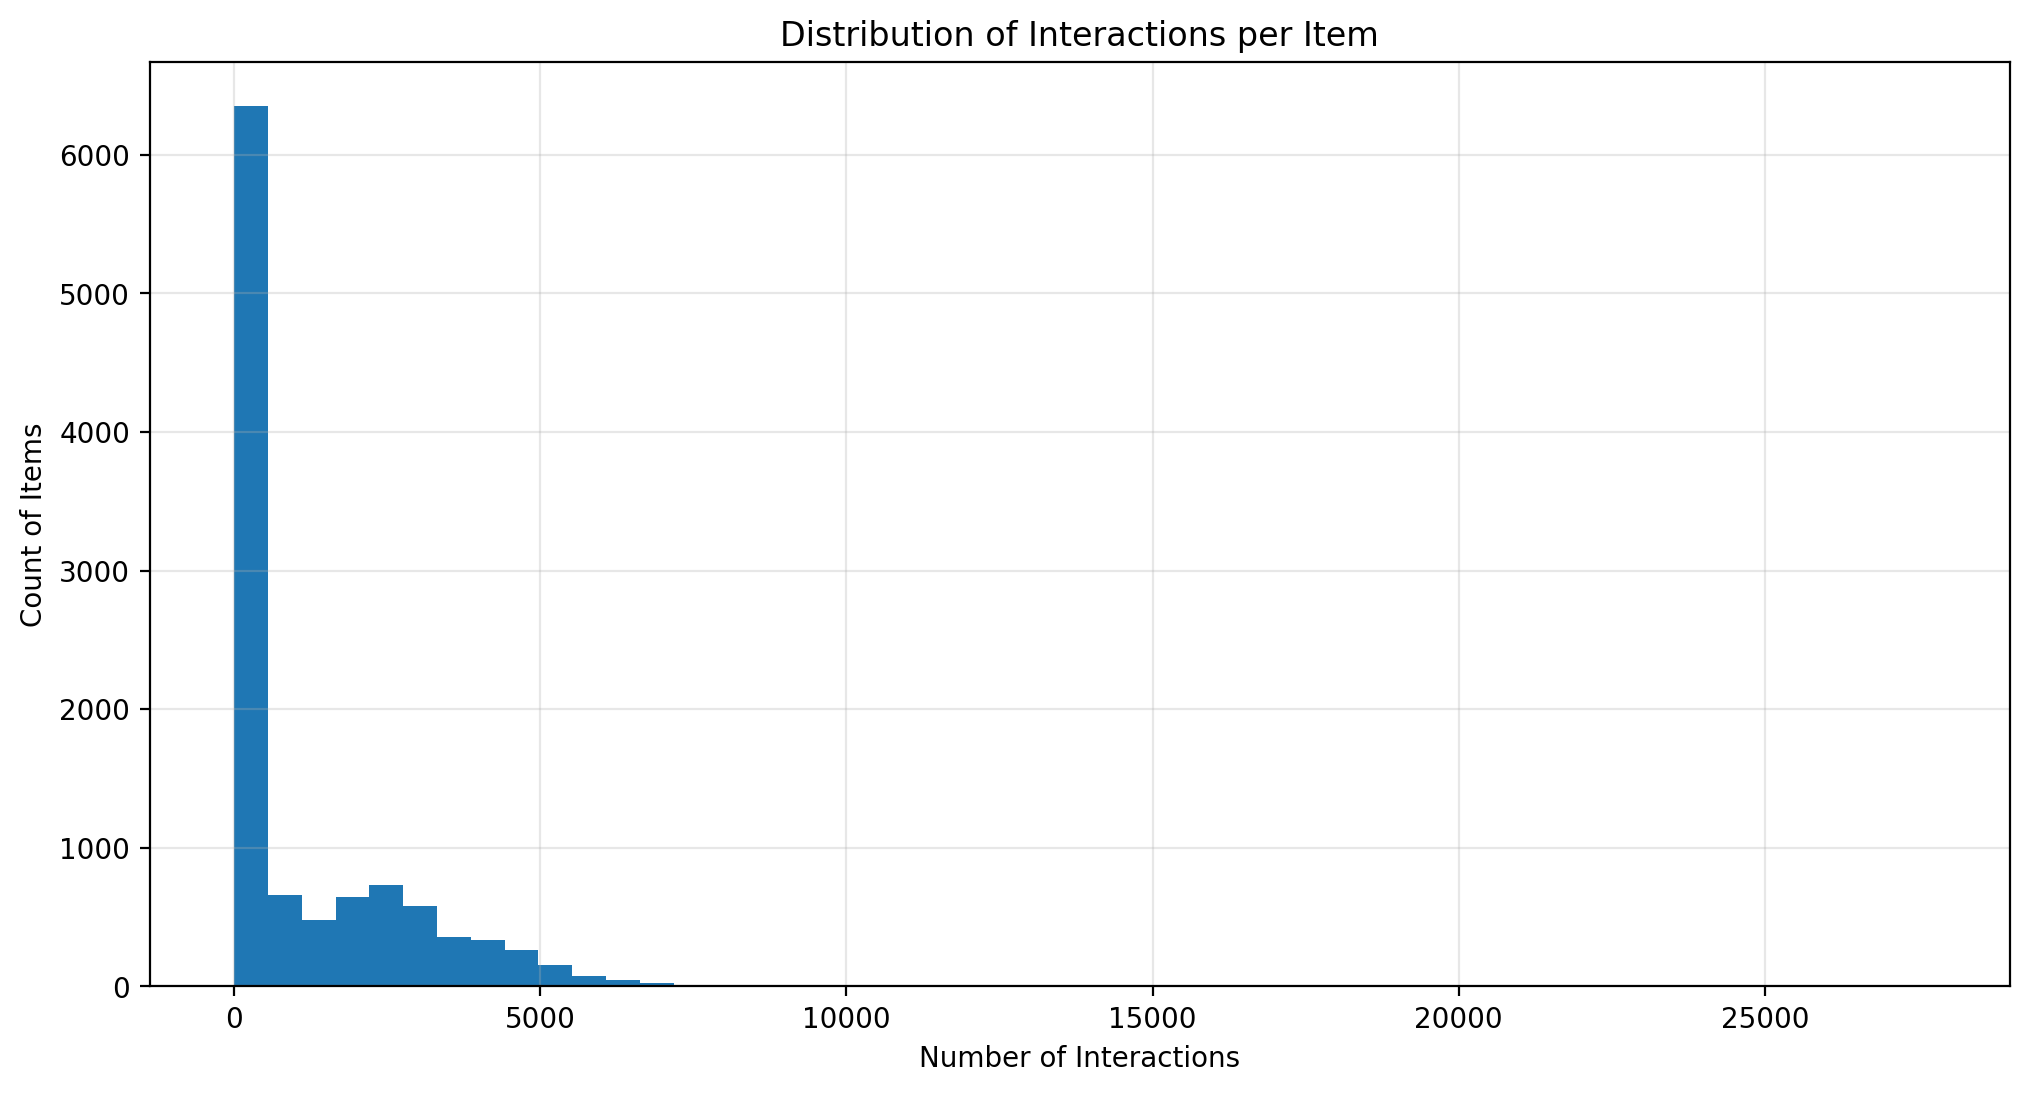

In [18]:
# Let's see the distribution of the interactions per item
item_counts = df["video_id"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

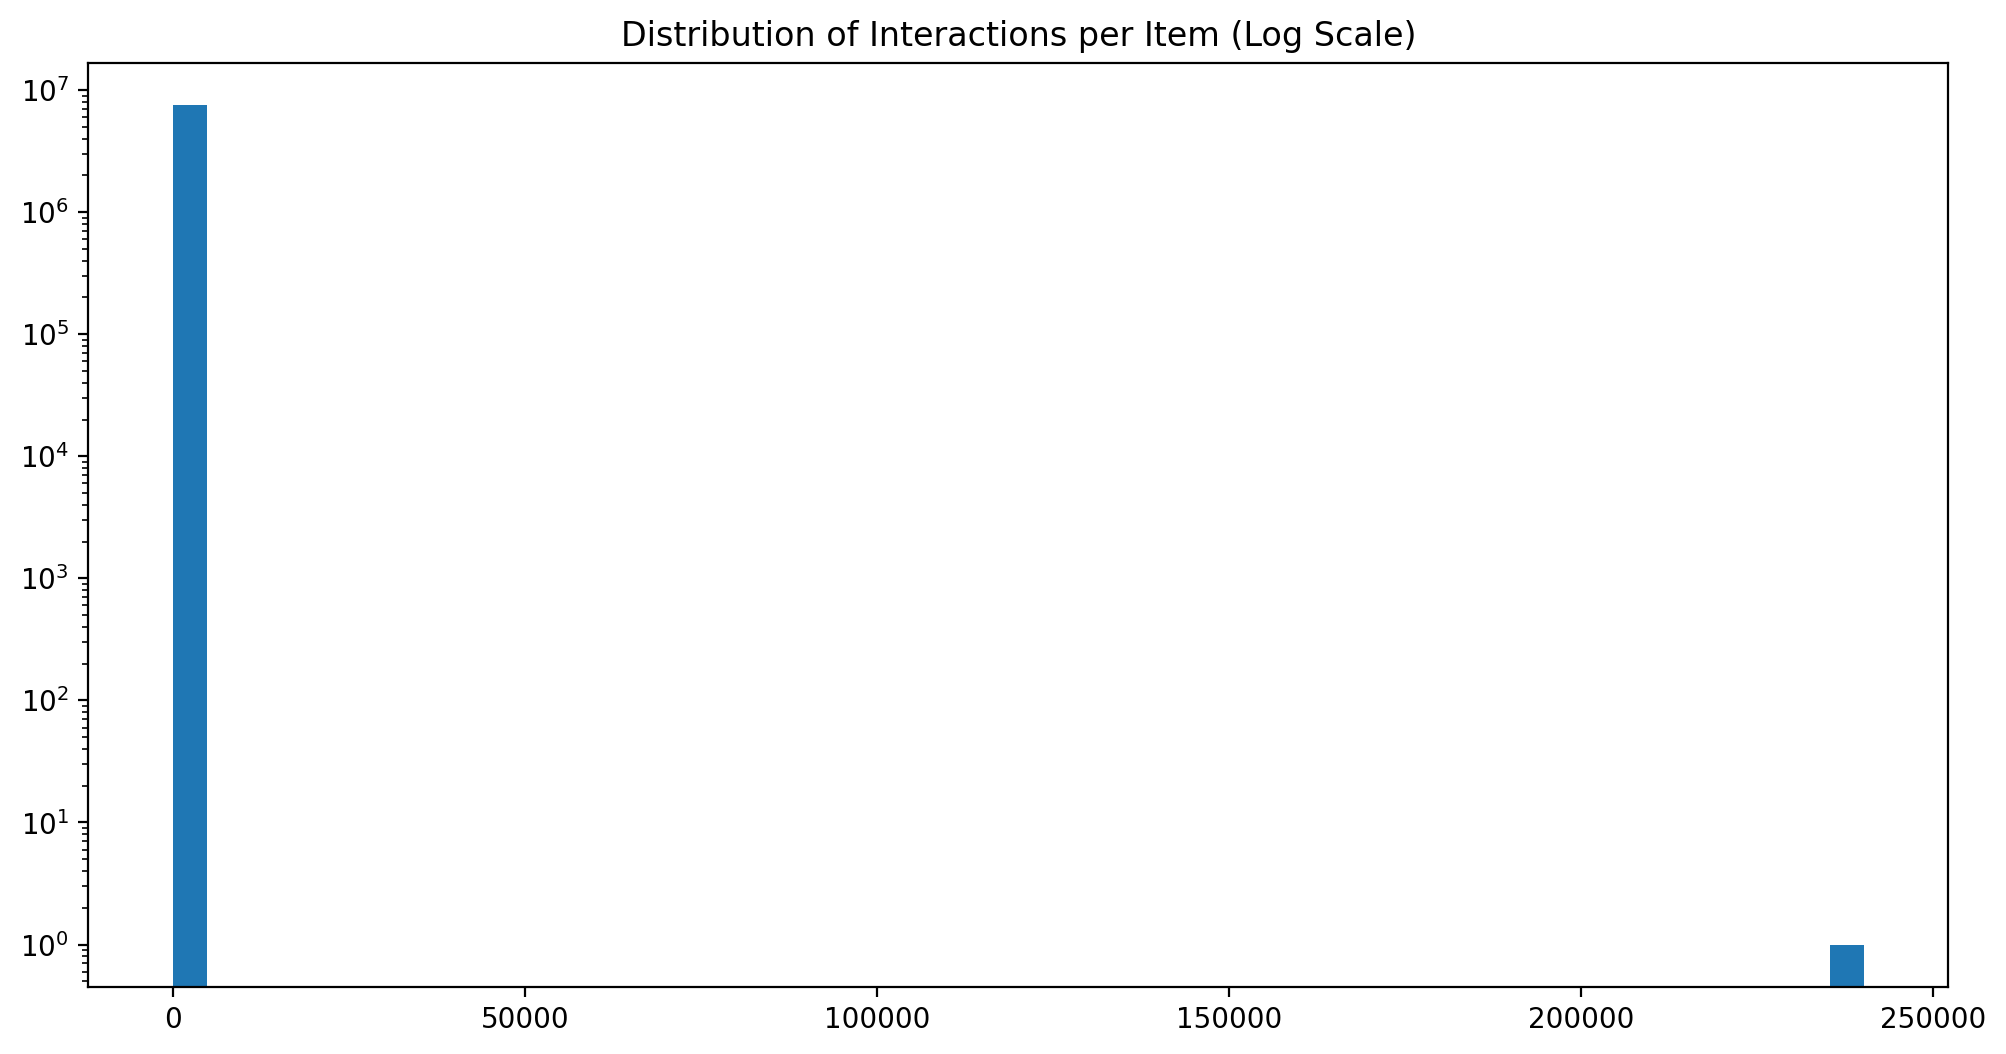

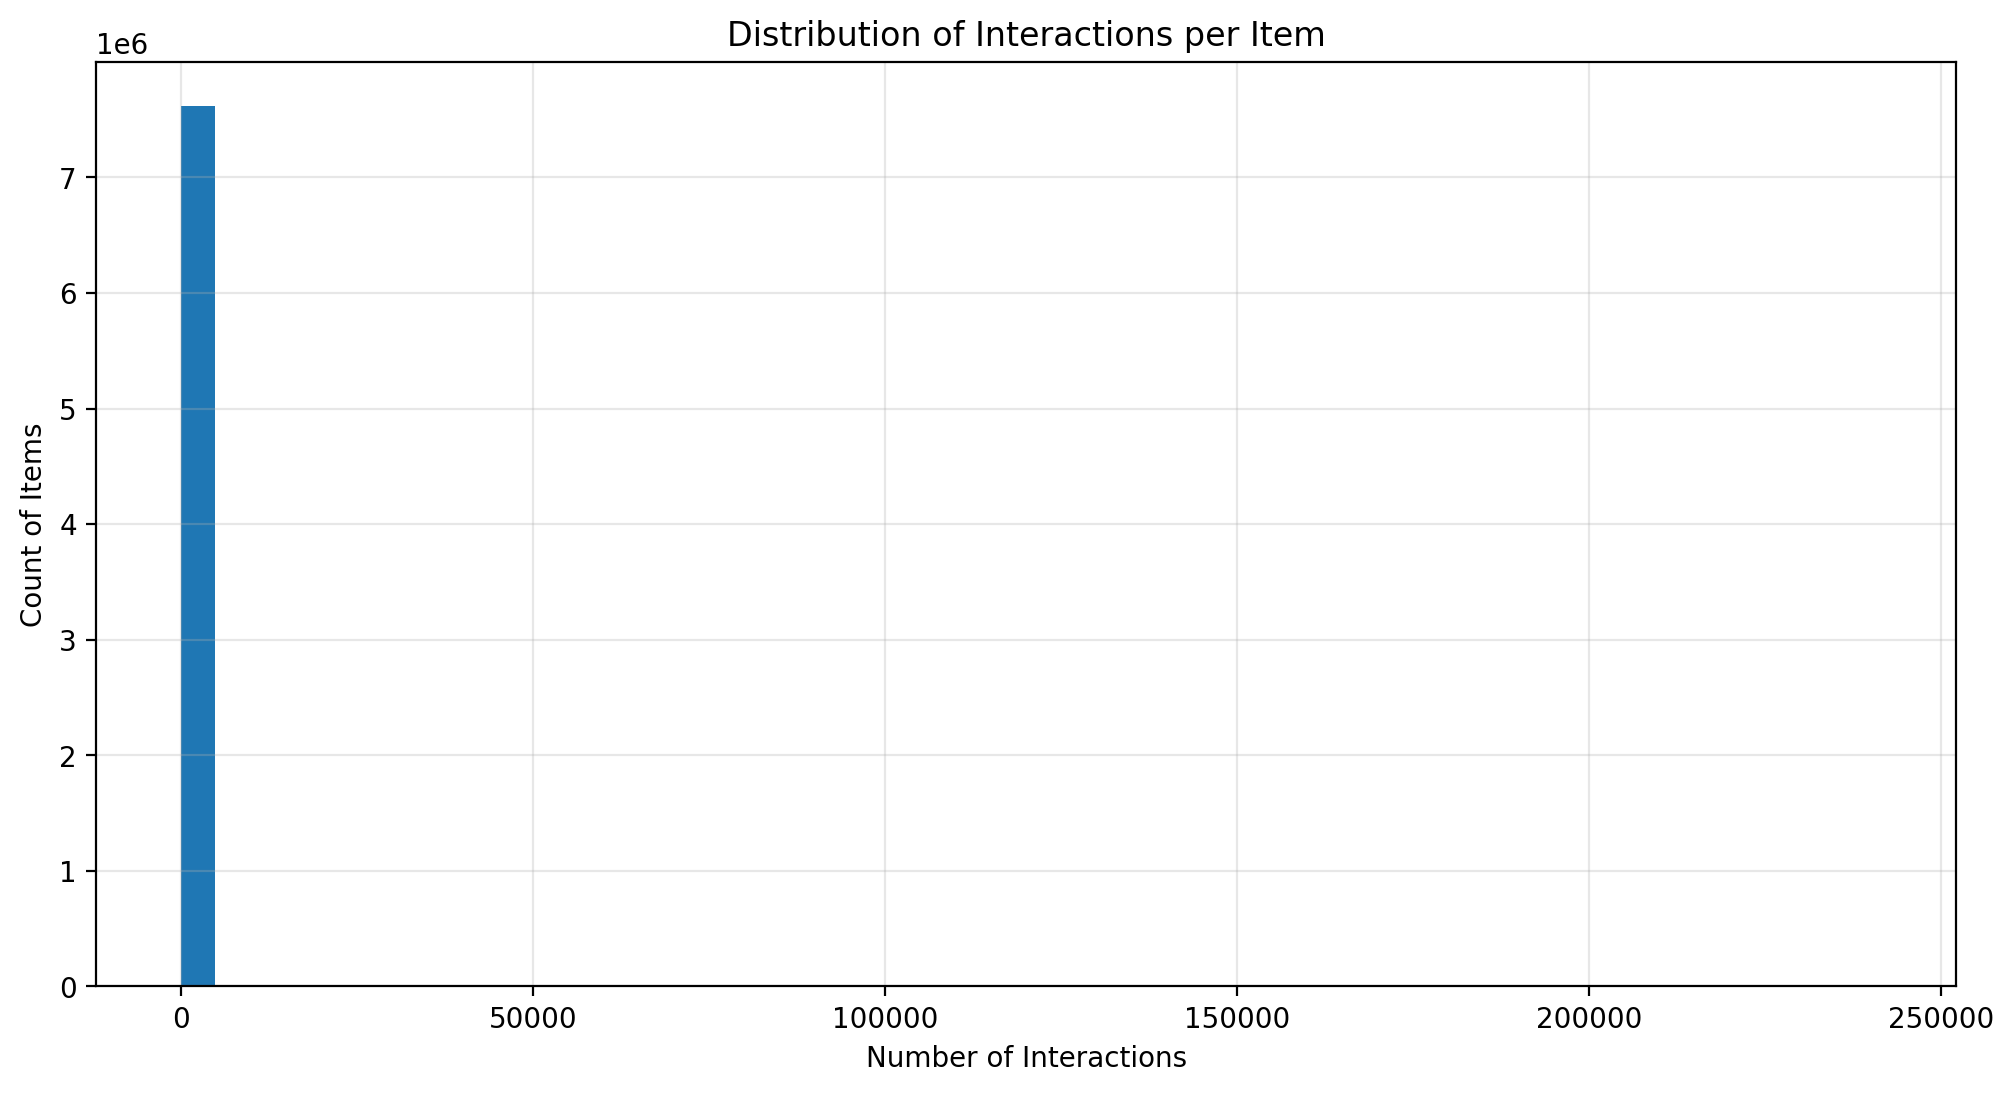

In [21]:
# Let's see the distribution of the interactions per item
item_counts = df["watch_ratio"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

In [ ]:
# plot rating frequency of all movies
ax = (
    book_rating_freq.sort_values("count", ascending=False)
    .reset_index(drop=True)
    .plot(figsize=(12, 8), title="Rating Frequency of All Movies", fontsize=12)
)
ax.set_xlabel("Movie Id")
ax.set_ylabel("number of ratings")

In [ ]:


df['watch_ratio'].sort_values().plot()


: 